In [80]:
%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
import sklearn
import numpy as np

# PLAY-ing with Audio on Python with Librosa

[`librosa`](https://librosa.github.io/librosa/index.html) is a Python package for music and audio processing.

### Reading Audio

Use [`librosa.load`](https://librosa.github.io/librosa/generated/librosa.core.load.html#librosa.core.load) to load an audio file into an audio array. Return both the audio array as well as the sample rate:

In [72]:
x, sr = librosa.load('example2_sad.wav')

In [59]:
print(x.shape)
print(sr)

(65047,)
22050


### Visualizing Audio

Plot the audio array using [`librosa.display.waveplot`](https://librosa.github.io/librosa/generated/librosa.display.waveplot.html#librosa.display.waveplot):

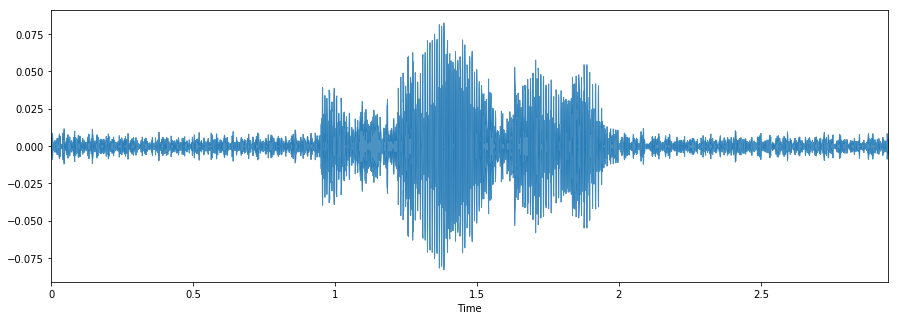

In [13]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr, alpha=0.8)

You can display a spectrogram using [`librosa.display.specshow`](https://librosa.github.io/librosa/generated/librosa.display.specshow.html):

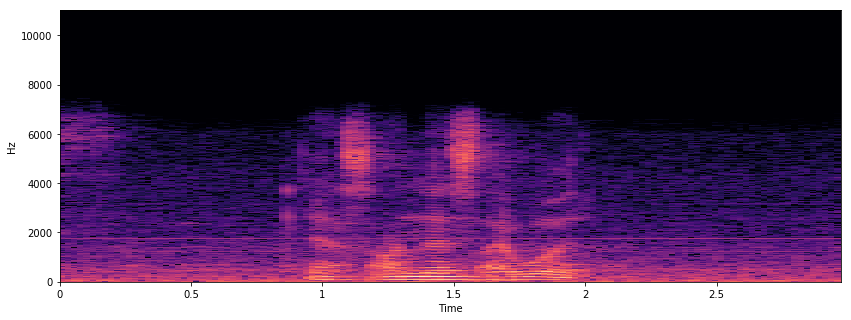

In [60]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

### Playing Audio

Using [`IPython.display.Audio`](http://ipython.org/ipython-doc/2/api/generated/IPython.lib.display.html#IPython.lib.display.Audio), you can play an audio file:

In [62]:
ipd.Audio(x, rate=sr)

 `Audio` can also accept a NumPy array. So you can synthesize a pure tone at 440 Hz

In [63]:
import numpy
sr = 22050 # sample rate
T = 2.0    # seconds
t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*numpy.sin(2*numpy.pi*440*t)                # pure sine wave at 440 Hz

In [69]:
ipd.Audio(x,rate=sr)

### Writing Audio

[`librosa.output.write_wav`](https://librosa.github.io/librosa/generated/librosa.output.write_wav.html#librosa.output.write_wav) saves a NumPy array to a WAV file.

In [66]:
librosa.output.write_wav('tone_440.wav', x, sr)

## Extracting Features

### Mel Frequency Cepstral Coefficients (MFCCs)

The [`mel frequency cepstral coefficients`](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum) (MFCCs) of a signal are a small set of features (usually about 10-20) which concisely describe the overall shape of a spectral envelope. In MIR, it is often used to describe timbre.

In [30]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

(20, 128)


The very first MFCC, the 0th coefficient, does not convey information relevant to the overall shape of the spectrum. It only conveys a constant offset, i.e. adding a constant value to the entire spectrum. Therefore, many practitioners will discard the first MFCC when performing classification. For now, we will use the MFCCs as is.

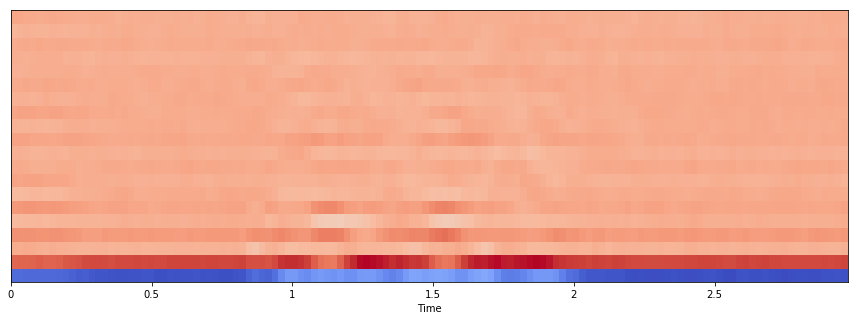

In [33]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

### Feature Scaling

Let's scale the MFCCs such that each coefficient dimension has zero mean and unit variance:

In [70]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[-5.55111512e-17 -1.12083635e-16 -8.50014503e-17 -7.80625564e-18
  3.12250226e-17 -2.71050543e-17  1.21430643e-17 -2.08166817e-17
 -5.76795556e-17  1.06251813e-17  3.20923843e-17 -3.98986399e-17
  7.65446734e-17  3.46944695e-18  1.38777878e-17  5.52943108e-17
 -1.11022302e-16  3.81639165e-17  2.25514052e-17 -7.87130777e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


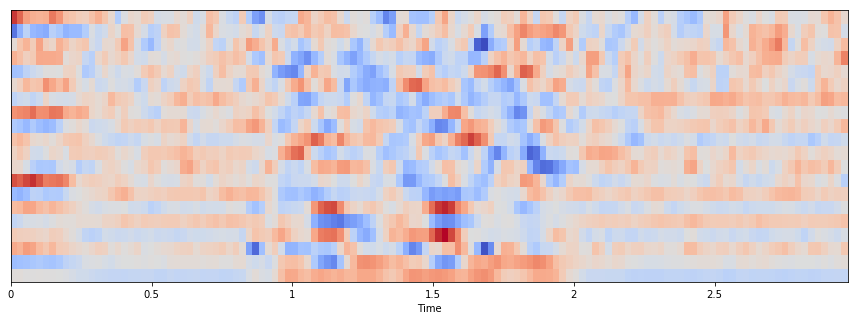

In [41]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

### Zero Crossing Rate (ZCR)

The zero crossing rate indicates the number of times that a signal crosses the horizontal axis. This can tell us the level of silence or voice in the signal

First we plot the signal

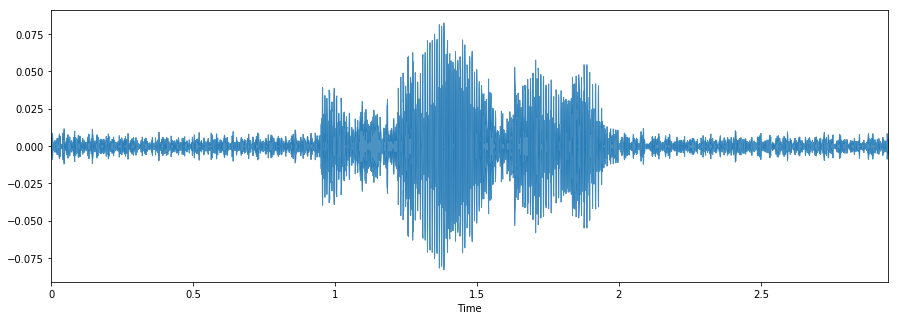

In [56]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr, alpha=0.8)

In [71]:
zcrs = librosa.feature.zero_crossing_rate(x)
print(zcrs.shape)

(1, 87)


Note that the Zero-crossing rate correspons to the presence of voice in the audio signal

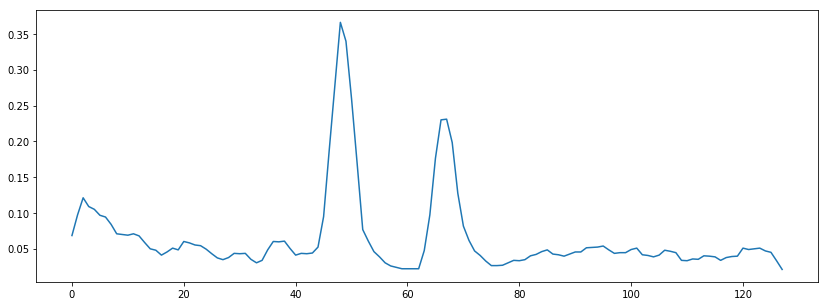

In [57]:
plt.figure(figsize=(14, 5))
plt.plot(zcrs[0])

### Root Mean Square Energy

The energy of a signal corresponds to the total magntiude of the signal.

In [74]:
rmse = librosa.feature.rmse(x, center=True)

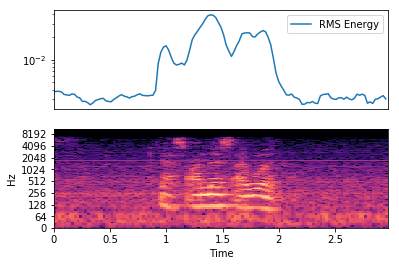

In [81]:
import matplotlib.pyplot as plt
plt.figure()
S, phase = librosa.magphase(librosa.stft(x))
plt.subplot(2, 1, 1)
plt.semilogy(rmse.T, label='RMS Energy')
plt.xticks([])
plt.xlim([0, rmse.shape[-1]])
plt.legend(loc='best')
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time')